In [85]:
import pandas as pd 
import numpy as np
import os 
import numpy as np
import itertools
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
currdir = os.getcwd()
parent = os.path.dirname(currdir)
gparent = os.path.dirname(parent)
import re
import matplotlib.pyplot as plt

In [86]:
filename = f"{parent}/t-test_results/Div19_CNO/Div19_1minute/ttest_results_CNO1minute.xlsx"
xls = pd.ExcelFile(filename)
sheets = {}
for ind, x in enumerate(xls.sheet_names):
    sheets[x] = pd.read_excel(filename,   header=[0, 1], index_col=0, sheet_name=x)
sheets.keys()

dict_keys(['basal', '5uMCNO', '10uMCNO', '15uMCNO', '20uMCNO'])

In [87]:
sheets['basal']

Number of Spikes                        Mean Firing Rate (Hz)  \
                   t-stat adj p-value FoldChange                t-stat   
GPR37L 1        -0.770300           1   0.780912             -0.770300   
GPR37L 2        -0.148583           1   0.964293             -0.148582   
LGI2 A12        -1.070564           1   0.742784             -1.070564   
SLITRK5          0.250448           1   1.067956              0.250448   
THSD7 1         -1.746957           1   0.586386             -1.746956   
THSD7 2         -1.441193           1   0.650805             -1.441193   

                                ISI Coefficient of Variation - Avg  \
         adj p-value FoldChange                             t-stat   
GPR37L 1           1   0.780912                          -0.209748   
GPR37L 2           1   0.964293                           0.980387   
LGI2 A12           1   0.742784                           0.750532   
SLITRK5            1   1.067956                           0.348347   
THSD7 1            1   0.586386                           0.023812   
THSD7 2            1   0.650805                          -0.668871   

                                Number of Active Electrodes  ...  \
         adj p-value FoldChange                      t-stat  ...   
GPR37L 1           1   0.972897                   -0.711590  ...   
GPR37L 2           1   1.167926                   -0.182657  ...   
LGI2 A12           1   1.117673                   -1.390677  ...   
SLITRK5            1   1.050855                    0.554631  ...   
THSD7 1            1   1.003705                   -1.723281  ...   
THSD7 2            1   0.896723                   -0.307860  ...   

         Resistance - Avg (kOhms) Resistance - Std (kOhms)              \
                       FoldChange                   t-stat adj p-value   
GPR37L 1                 0.973497                 0.859470     1.00000   
GPR37L 2                 0.973492                 1.639666     1.00000   
LGI2 A12                 1.003824                 0.232928     1.00000   
SLITRK5                  0.881697                 1.897127     1.00000   
THSD7 1                  0.944707                -0.264696     1.00000   
THSD7 2                  0.846483                 3.798592     0.02339   

                    Number of Covered Electrodes                         \
         FoldChange                       t-stat adj p-value FoldChange   
GPR37L 1   1.104961                     0.000000    1.000000   1.000000   
GPR37L 2   1.281414                    -0.727607    1.000000   0.984293   
LGI2 A12   1.032351                     0.000000    1.000000   1.000000   
SLITRK5    1.251440                    -1.417642    1.000000   0.984293   
THSD7 1    0.970736                     0.000000    1.000000   1.000000   
THSD7 2    1.877188                    -3.350805    0.088959   0.853403   

         Weighted Mean Resistance (kOhms)                         
                                   t-stat adj p-value FoldChange  
GPR37L 1                        -1.020858       1.000   0.975113  
GPR37L 2                        -0.469709       1.000   0.989002  
LGI2 A12                         0.250390       1.000   1.006167  
SLITRK5                         -4.572164       0.002   0.889213  
THSD7 1                         -2.155532       1.000   0.946190  
THSD7 2                         -2.051072       1.000   0.947411  

[6 rows x 165 columns]

In [88]:
sheets['10uMCNO']

Number of Spikes                        Mean Firing Rate (Hz)  \
                   t-stat adj p-value FoldChange                t-stat   
GPR37L 1         0.284931           1   1.065897              0.284931   
GPR37L 2         1.802013           1   1.438313              1.802013   
LGI2 A12         1.523628           1   1.376789              1.523628   
SLITRK5          0.745415           1   1.155654              0.745415   
THSD7 1          1.041112           1   1.236040              1.041112   
THSD7 2          0.854125           1   1.237111              0.854125   

                                ISI Coefficient of Variation - Avg  \
         adj p-value FoldChange                             t-stat   
GPR37L 1           1   1.065897                          -0.472580   
GPR37L 2           1   1.438313                           1.780736   
LGI2 A12           1   1.376789                           1.056659   
SLITRK5            1   1.155654                          -1.084793   
THSD7 1            1   1.236040                           1.180878   
THSD7 2            1   1.237111                           0.465580   

                                Number of Active Electrodes  ...  \
         adj p-value FoldChange                      t-stat  ...   
GPR37L 1           1   0.947080                    0.586041  ...   
GPR37L 2           1   1.255539                    0.283398  ...   
LGI2 A12           1   1.141297                    1.442417  ...   
SLITRK5            1   0.887170                    0.306786  ...   
THSD7 1            1   1.148726                    1.242938  ...   
THSD7 2            1   1.053618                   -0.416299  ...   

         Full Width at Half Height of Cross-Correlation  \
                                             FoldChange   
GPR37L 1                                       0.655652   
GPR37L 2                                       0.781587   
LGI2 A12                                       0.892131   
SLITRK5                                        1.000102   
THSD7 1                                        0.705545   
THSD7 2                                        0.626106   

         Percent Bursts with Start Electrode                         \
                                      t-stat adj p-value FoldChange   
GPR37L 1                           -0.075919           1   0.991495   
GPR37L 2                           -1.127031           1   0.880893   
LGI2 A12                           -0.315382           1   0.964002   
SLITRK5                            -1.210059           1   0.874807   
THSD7 1                            -0.221343           1   0.974876   
THSD7 2                            -0.663053           1   0.925059   

         Burst Peak (Max Spikes per sec)                         \
                                  t-stat adj p-value FoldChange   
GPR37L 1                       -0.817928    1.000000   0.938767   
GPR37L 2                       -2.665263    0.539370   0.807369   
LGI2 A12                       -1.359777    1.000000   0.904549   
SLITRK5                        -3.539987    0.047350   0.775874   
THSD7 1                        -2.460502    0.902150   0.825649   
THSD7 2                        -3.020763    0.209487   0.803129   

         Time to Burst Peak (ms)                         
                          t-stat adj p-value FoldChange  
GPR37L 1               -0.700753           1   0.857717  
GPR37L 2               -0.754679           1   0.861913  
LGI2 A12               -0.526621           1   0.900377  
SLITRK5                 0.413125           1   1.079535  
THSD7 1                -0.015188           1   0.996787  
THSD7 2                -0.815358           1   0.852735  

[6 rows x 153 columns]

In [89]:
sheets['basal'].columns

MultiIndex([(                  'Number of Spikes',      't-stat'),
            (                  'Number of Spikes', 'adj p-value'),
            (                  'Number of Spikes',  'FoldChange'),
            (             'Mean Firing Rate (Hz)',      't-stat'),
            (             'Mean Firing Rate (Hz)', 'adj p-value'),
            (             'Mean Firing Rate (Hz)',  'FoldChange'),
            ('ISI Coefficient of Variation - Avg',      't-stat'),
            ('ISI Coefficient of Variation - Avg', 'adj p-value'),
            ('ISI Coefficient of Variation - Avg',  'FoldChange'),
            (       'Number of Active Electrodes',      't-stat'),
            ...
            (          'Resistance - Avg (kOhms)',  'FoldChange'),
            (          'Resistance - Std (kOhms)',      't-stat'),
            (          'Resistance - Std (kOhms)', 'adj p-value'),
            (          'Resistance - Std (kOhms)',  'FoldChange'),
            (      'Number of Covered Electrod

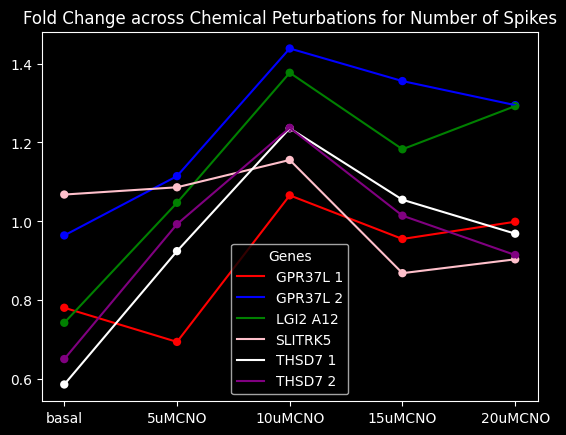

In [90]:
def gene_across_doses(all_dosagesdic, gene, testparam):
    genevals = []
    pvalsig = []
    for dose in all_dosagesdic:
        genevals.append(all_dosagesdic[dose][testparam]["FoldChange"][gene])
        pvalsig.append(all_dosagesdic[dose][testparam]["adj p-value"][gene] < 0.05)
    return genevals, pvalsig

dosages = list(sheets.keys())
genes = sheets['basal'].index
genecolors = dict(zip(genes, ['red', 'blue', 'green', 'pink', 'white', 'purple', 'orange']))
test_params = sheets['basal'].columns.get_level_values(0)

for ind, tst in enumerate(test_params):
    if ind == 0:
        for gene in genes:
            genevals, hrej = gene_across_doses(sheets, gene, tst)
            for dose, val, reject in zip(dosages, genevals, hrej):
                edgecolor = 'red' if reject else 'none'  # red if True, no color if False
                plt.scatter(dose, val, color=genecolors[gene], edgecolor=edgecolor, linewidth=2)
            plt.plot(dosages, genevals, color=genecolors[gene], label=gene)
        plt.title(f'Fold Change across Chemical Peturbations for {tst}')
        plt.legend(title='Genes', loc= 'bottom right')
            # Connect dots
            # plt.plot(days, fold_changes, color=genotype_colors[genotype], label=genotype)
        
            # plt.plot(genevals)
    # test_params
    # for gene in genes:
    # plot_dose()

In [60]:
unique_parameters = sheets['basal'].index.get_level_values('Parameter').unique()


genotype_colors = {
    'gad2cre': 'blue',
    'emxcre': 'green',
}

## Plotting
unique_parameters = df.index.get_level_values('Parameter').unique()
for parameter in unique_parameters:
    plt.figure(figsize=(10, 6))
    parameter_data = df.loc[parameter]

    for genotype in parameter_data.index.get_level_values('Genotype').unique():
        genotype_data = parameter_data.xs(genotype, level='Genotype')
        days = ['div7', 'div10', 'div13']
        fold_changes = []

        for day in days:
            if day in genotype_data.index:
                day_data = genotype_data.loc[day]
                fold_changes.append(day_data['Fold-Change'])
                edgecolor = 'red' if day_data['Hypothesis Rejected'] else 'none'
                plt.scatter(day, day_data['Fold-Change'], color=genotype_colors[genotype], edgecolor=edgecolor, linewidth=2)

        # Connect dots
        plt.plot(days, fold_changes, color=genotype_colors[genotype], label=genotype)
    
    plt.title(f'Fold Change Over Time for {parameter}')
    plt.xlabel('Day')
    plt.ylabel('Fold-Change')
    plt.legend()
    plt.savefig(f"plots/{parameter}")
    plt.show()

KeyError: 'basal'